<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/KerasRegressionDense4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 데이터 가져오기

In [4]:
from google.colab import files
import io
data = files.upload()

Saving result.csv to result.csv


In [5]:
df = pd.read_csv('result.csv')

In [6]:
df

,Unnamed: 0,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito_Value
0,0,2021-09-27,21.6,18.7,25.0,0.0,2.4,52,66.0,2.2,21.6,16.1,0.0,63.1
1,1,2021-09-26,22.6,18.4,27.3,0.0,2.3,50,63.0,8.3,23.9,14.6,0.0,70.2
2,2,2021-09-25,21.2,18.7,23.1,0.0,2.3,66,72.6,0.0,21.1,14.3,0.0,70.5
3,3,2021-09-24,21.8,16.7,26.9,0.0,2.2,46,67.5,9.9,23.1,12.1,0.0,70.5
4,4,2021-09-23,20.9,16.9,25.9,0.0,2.4,48,67.3,8.0,22.7,11.9,0.0,63.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1065,2016-05-05,18.9,10.2,26.9,7.5,1.7,17,50.8,10.9,20.0,3.6,17.0,24.4
1034,1066,2016-05-04,15.7,10.2,20.6,0.0,5.1,28,46.6,12.8,16.6,8.9,0.0,25.6
1035,1067,2016-05-03,12.9,8.9,17.6,27.0,4.9,72,86.1,0.0,14.8,8.5,27.0,30.4
1036,1068,2016-05-02,21.1,16.5,28.4,16.5,2.2,33,64.5,7.5,24.4,12.1,43.5,27.4


#### 데이터 랜덤 배치

In [7]:
train=df.sample(frac=0.8)
test=df.sample(frac=0.2)

In [9]:
train

,Unnamed: 0,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito_Value
68,68,2021-07-21,30.5,25.3,35.3,0.0,1.7,40,64.0,11.3,30.5,22.0,0.0,68.5
114,114,2021-06-05,20.8,17.0,25.7,0.0,3.3,40,68.1,8.4,22.2,13.6,0.0,56.0
211,211,2020-08-31,26.4,23.8,30.0,0.0,2.8,67,77.9,1.9,27.2,21.9,0.0,87.3
467,475,2019-06-12,21.5,16.1,26.4,0.0,1.8,40,57.1,13.0,24.4,11.7,0.0,34.1
535,559,2018-09-20,19.0,17.8,20.1,5.0,1.8,57,82.4,0.0,19.8,16.8,29.5,51.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,1067,2016-05-03,12.9,8.9,17.6,27.0,4.9,72,86.1,0.0,14.8,8.5,27.0,30.4
670,696,2018-05-06,16.6,15.0,20.7,22.0,1.1,60,86.4,3.2,17.2,11.7,22.0,3.2
872,903,2016-10-14,16.7,10.5,23.5,0.0,1.3,39,61.8,8.5,17.2,7.1,0.0,18.6
7,7,2021-09-20,23.7,19.0,28.4,0.0,2.7,48,63.6,10.3,29.0,14.1,0.0,74.5


In [10]:
test

,Unnamed: 0,Date,Mean Temperature(°C),Minimum Temperature(°C),Maximum Temperature(°C),Precipitation(mm),Mean Wind Speed (m/s),Minimum Relative Humidity(%),Mean Relative Humidity(%),Duration of Sunshine(hr),Mean Surface Temperature(°C),Minimum Grass Temperature(°C),Cumulative Precipitation (mm),Mosquito_Value
348,348,2019-10-17,15.4,11.2,21.6,0.0,1.7,31,56.0,7.4,17.2,6.4,0.0,11.1
766,797,2017-07-28,25.5,24.8,26.9,8.5,1.5,86,92.1,0.0,25.9,23.9,8.5,100.0
237,237,2020-08-05,26.5,25.5,29.1,18.5,1.9,81,92.1,0.1,26.7,24.3,94.2,75.6
795,826,2017-06-29,26.2,21.9,31.5,0.0,2.2,40,64.8,9.5,29.5,19.8,0.0,100.0
998,1030,2016-06-09,24.1,17.8,31.3,0.0,2.0,31,59.5,12.4,32.8,14.8,0.0,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,2019-09-18,21.0,16.0,25.4,0.0,3.1,27,46.0,11.7,25.4,9.4,0.0,52.2
843,874,2017-05-12,19.1,16.8,21.1,0.0,2.1,63,71.6,0.0,17.6,11.1,0.0,17.4
895,926,2016-09-21,20.2,14.3,25.3,0.0,2.0,28,43.4,10.8,22.9,10.8,0.0,62.4
281,281,2020-06-22,28.6,21.7,35.4,0.0,2.0,26,50.5,13.3,36.3,16.1,0.0,75.2


In [11]:
train_data_set = train.values
X_train = train_data_set[:, 2:-1].astype(float)
Y_train = train_data_set[:, -1].astype(float)

In [12]:
test_data_set = test.values
X_test = test_data_set[:, 2:-1].astype(float)
Y_test = test_data_set[:, -1].astype(float)

### 모델 구성

In [13]:
model = Sequential()
model.add(Dense(1024, input_dim = 11, activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

### 모델 학습과정 설정

In [39]:
#model.compile(loss='mse', optimizer='adam',metrics='accuracy')
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

### 모델 학습

In [40]:
hist=model.fit(X_train, Y_train, epochs=10000, batch_size=32)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
26/26 [==============================] - 0s 17ms/step - loss: 0.0060 - mae: 0.0505
Epoch 7502/10000
26/26 [==============================] - 1s 21ms/step - loss: 0.0058 - mae: 0.0506
Epoch 7503/10000
26/26 [==============================] - 1s 19ms/step - loss: 0.0059 - mae: 0.0527
Epoch 7504/10000
26/26 [==============================] - 0s 17ms/step - loss: 0.0055 - mae: 0.0508
Epoch 7505/10000
26/26 [==============================] - 1s 20ms/step - loss: 0.0050 - mae: 0.0483
Epoch 7506/10000
26/26 [==============================] - 0s 19ms/step - loss: 0.0048 - mae: 0.0471
Epoch 7507/10000
26/26 [==============================] - 0s 17ms/step - loss: 0.0047 - mae: 0.0480
Epoch 7508/10000
26/26 [==============================] - 0s 18ms/step - loss: 0.0048 - mae: 0.0483
Epoch 7509/10000
26/26 [==============================] - 1s 21ms/step - loss: 0.0041 - mae: 0.0445
Epoch 7510/10000
26/26 [==============================] - 0s 17ms/step - loss: 0.

### 학습과정 살펴보기



In [42]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[1.3144229650497437, 0.7764160633087158, 0.46455907821655273, 0.3429153561592102, 0.2825930416584015, 0.28904929757118225, 0.40632331371307373, 0.9301981925964355, 1.1360200643539429, 1.0911036729812622, 0.8591141104698181, 0.8792835474014282, 0.9369320273399353, 0.8352214694023132, 1.0411698818206787, 3.4125425815582275, 7.17893648147583, 12.46213150024414, 8.13659381866455, 21.340776443481445, 40.71889114379883, 13.794286727905273, 3.6395795345306396, 1.2373980283737183, 0.6254760026931763, 0.3514274060726166, 0.23694053292274475, 0.1716371327638626, 0.1313241869211197, 0.11178155988454819, 0.08262626826763153, 0.0710144117474556, 0.06238028407096863, 0.0572090782225132, 0.0498320609331131, 0.038496825844049454, 0.03151443973183632, 0.029760148376226425, 0.026298249140381813, 0.023266352713108063, 0.0203216765075922, 0.01761808432638645, 0.016488537192344666, 0.015447083860635757, 0.012938515283167362, 0.011140883900225163, 0.010294284671545029, 0.01057218

### 모델 평가하기

In [44]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 4ms/step - loss: 193.6967 - mae: 5.2787
## evaluation loss and_metrics ##
[193.69674682617188, 5.278677940368652]


# 모델 사용하기


In [20]:
# 이건 아직 불확실해요!!
xhat = X_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

## yhat ##
[[11.072414]]


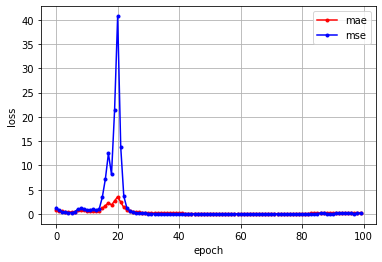

In [46]:
import matplotlib.pyplot as plt

y_acc = hist.history['mae']
y_loss = hist.history['loss']

#x_len = np.arange(len(y_loss)) 
x_len = np.arange(100)
plt.plot(x_len, y_acc[:100], marker='.', c='red', label="mae")
plt.plot(x_len, y_loss[:100], marker='.', c='blue', label="mse")


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()